# Max-Cut Sample - Hybrid


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=False,alpha=0.6,node_size=50,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

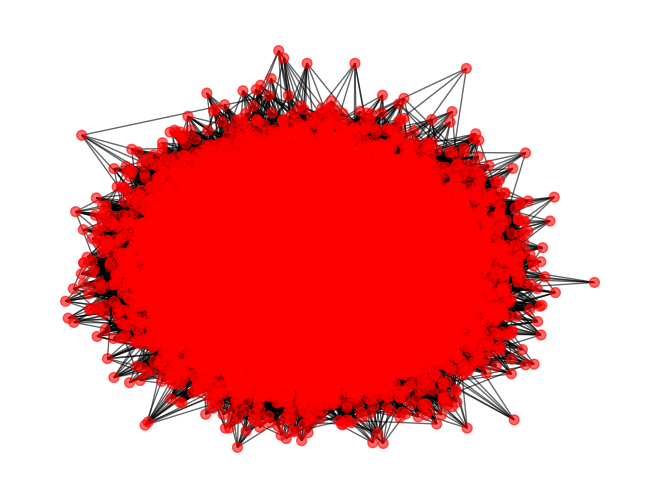

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/20000-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  20000 nodes, density:  0.0010000750037501875


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
#import time

#ts_start = time.time()
#cut = dnx.maximum_cut(G, exactsolver)
#ts_stop = time.time()
#print(cut)
#print('elapsed time of exact solver (s): ',round(ts_stop - ts_start,2))

In [7]:
#draw_graph(G,cut,pos)

In [8]:
#print('cut-size: ',cut_size(G,cut))

## Hybrid Solver

In [9]:
from dwave.system import LeapHybridSampler

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' hybrid'

hybridsampler = LeapHybridSampler()
cut = dnx.maximum_cut(G, hybridsampler,label=label)

In [10]:
cut

{0,
 1,
 6,
 7,
 10,
 12,
 13,
 17,
 19,
 20,
 21,
 22,
 23,
 26,
 27,
 34,
 35,
 38,
 40,
 41,
 45,
 46,
 50,
 51,
 53,
 55,
 56,
 59,
 62,
 63,
 64,
 65,
 66,
 78,
 79,
 81,
 83,
 85,
 86,
 89,
 92,
 93,
 95,
 96,
 99,
 100,
 104,
 106,
 107,
 108,
 111,
 114,
 120,
 121,
 124,
 127,
 128,
 130,
 134,
 135,
 137,
 140,
 141,
 143,
 144,
 145,
 146,
 147,
 148,
 152,
 153,
 154,
 156,
 158,
 159,
 160,
 161,
 165,
 166,
 167,
 181,
 188,
 193,
 194,
 195,
 197,
 199,
 201,
 202,
 205,
 206,
 207,
 208,
 209,
 212,
 213,
 218,
 220,
 221,
 225,
 226,
 227,
 229,
 230,
 231,
 232,
 236,
 237,
 238,
 240,
 241,
 244,
 245,
 246,
 247,
 248,
 251,
 252,
 259,
 261,
 262,
 264,
 271,
 275,
 277,
 278,
 279,
 283,
 284,
 285,
 293,
 294,
 296,
 298,
 300,
 301,
 303,
 304,
 305,
 306,
 308,
 311,
 313,
 314,
 315,
 316,
 318,
 319,
 320,
 325,
 327,
 328,
 329,
 330,
 332,
 334,
 336,
 337,
 342,
 344,
 345,
 347,
 348,
 350,
 354,
 356,
 358,
 361,
 362,
 363,
 364,
 365,
 367,
 369,
 372,

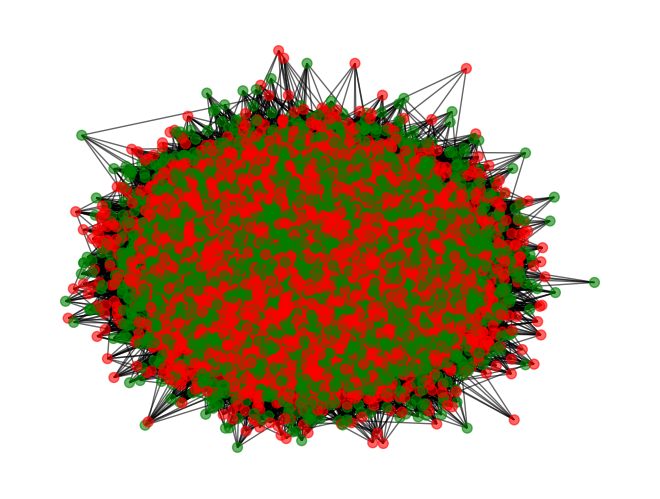

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  133576


In [13]:
len(list(G.neighbors(3455)))

20